In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Calculate maximum diameter given mirror dimensions
#
# Output: Estimates of number of mirrors for array

print('\n','THESE ARE ESTIMATES','\n')

### PARAMETERS ###
mr_dia = 9e-3                 # (m) Diameter of each mirror.
length_space = mr_dia         # (m) Length of space between mirrors. I assume space between mirrors is same dimension.
num_dia = 15                                   # Desired number of mirrors in array diameter (make sure it's ODD).

### Calculations for dimensions ###
if num_dia%2 == 0:
    print('Requires odd number of mirrors on diamter')
elif num_dia%2 != 0: # Odd number on diameter
    
    num_rad = math.floor(num_dia/2)                # Number in radius of array.
    num_rings = num_rad # Number of rings in array is equal to the number in the radius.
                                       # (Not including center mirror).

    ### IMPORTANT: Circumferences of rings are calculated to midpoints of rings ###
    rings_nums = np.zeros(num_rings)
    for i in range(num_rings):
        iter_dia = 2*(i+1)*(length_space+mr_dia) # Find diameter of each ring (remember, there's a 'space ring'
                                                 # between rings).
        iter_circ = np.pi*iter_dia # Find circumference of each ring.
        iter_num_circ = iter_circ/mr_dia # Find number of spaces plus mirrors on the circumference.
        iter_num_mr_circ = math.ceil(iter_num_circ/2) # Find number of mirrors on circumference.
        iter_num_spaces_circ = math.floor(iter_num_circ-iter_num_mr_circ) # Find number of spaces on circumference.
        rings_nums[i] = iter_num_mr_circ 

    total_mrs = np.sum(rings_nums)
    for i in range(len(rings_nums)):
        print('Ring',i+1,':',int(rings_nums[i]),'mirrors')

    print('Total mirrors:',total_mrs)

    array_circum = np.pi*iter_dia # Total array circumference
    array_area = np.pi*(iter_dia/2)**2 # Total array area

    print('\n','Array diameter:',iter_dia*100,'cm','\n',\
          'Array area:',array_area*100*100,'cm^2','\n',\
          'Array circumference:',array_circum*100,'cm')
    



 THESE ARE ESTIMATES 

Ring 1 : 7 mirrors
Ring 2 : 13 mirrors
Ring 3 : 19 mirrors
Ring 4 : 26 mirrors
Ring 5 : 32 mirrors
Ring 6 : 38 mirrors
Ring 7 : 44 mirrors
Total mirrors: 179.0

 Array diameter: 25.2 cm 
 Array area: 498.7592496839156 cm^2 
 Array circumference: 79.1681348704628 cm


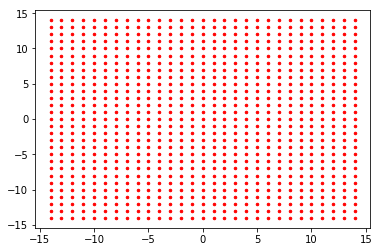

In [11]:
# Show mirror array

num_pix = iter_dia/mr_dia # number of "pixels" across diameter

xx = np.arange(-num_pix/2,num_pix/2)
yy = np.arange(-num_pix/2,num_pix/2)
II,JJ = np.meshgrid(xx,yy) # create x and y coords of mirror grid

plt.plot(II,JJ,marker='.',markersize=5,color='r',linestyle='none')


7


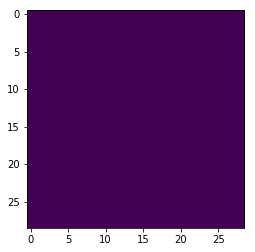

In [19]:
print(num_rings)
for i in range(num_rings):
    iter_dia = 2*(i+1)*(length_space+mr_dia) # Find diameter of each ring (remember, there's a 'space ring'
                                             # between rings).

dist = np.sqrt(II**2+JJ**2)        
pupil = (dist == iter_dia/mr_dia)
plt.imshow(pupil)